# This Notebook shows the steps needed to post a carrousel to Facebook

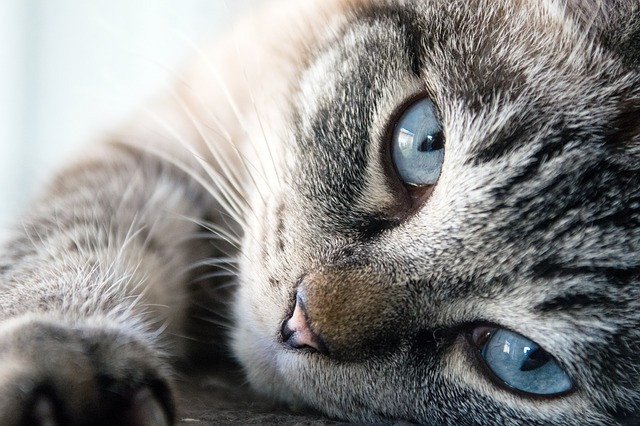

In [85]:
#get images based on product description
from unittest import TestCase
from python_pixabay import Pixabay
import urllib.request
from IPython.display import Image 



imageQuery1="cute+cat"
Price1=100

imageQuery2="bull+dog"
Price2=200



imageQuery3="parrot"
Price3=300


pix = Pixabay("7615608-e5e42eed07c9c35e14d7dea67")

imageUrl1=pix.image_search(q=imageQuery1)["hits"][0]["webformatURL"]
imageUrl2=pix.image_search(q=imageQuery2)["hits"][1]["webformatURL"]
imageUrl3=pix.image_search(q=imageQuery3)["hits"][0]["webformatURL"]


urllib.request.urlretrieve(imageUrl1, "image1.png")
urllib.request.urlretrieve(imageUrl2, "image2.png")
urllib.request.urlretrieve(imageUrl3, "image3.png")

Image(imageUrl1)
 


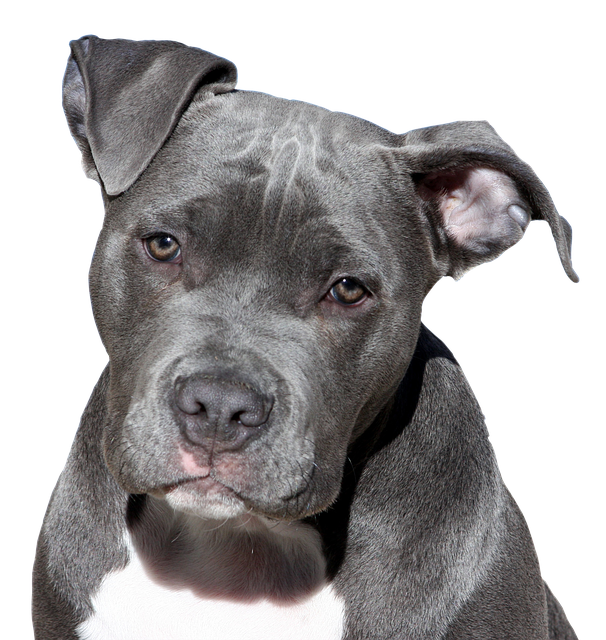

In [86]:
Image(imageUrl2)



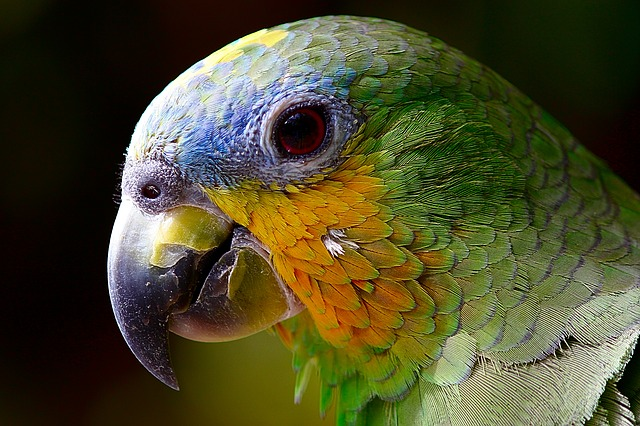

In [87]:
Image(imageUrl3)



In [90]:

from facebookads.adobjects.adaccount import AdAccount
from facebookads.adobjects.campaign import Campaign
from facebookads.adobjects.adset import AdSet
from facebookads.adobjects.adcreative import AdCreative
from facebookads.adobjects.ad import Ad
from facebookads.adobjects.adpreview import AdPreview
from facebookads.api import FacebookAdsApi
from facebookads.adobjects.adimage import AdImage
from facebookads.adobjects.adcreativeobjectstoryspec import AdCreativeObjectStorySpec
from facebookads.adobjects.adcreativelinkdatachildattachment import AdCreativeLinkDataChildAttachment
from facebookads.adobjects.adcreativelinkdata import AdCreativeLinkData

access_token = 'EAAcx8J3ioXsBABVWZAjbKjnnuDxjBkQYRWR0bgP8nXcRzCueVMLl2Ls79Mb0PZBddMVBKAXXcULMlxk7yPZBfZBzUubvV8kOkBn8Wt0rnCcKS0W0KCEAYj4JSHLeWX4rumD6g4bZCZARfYLaeAJiPKZAb4hFwinr6z2tXdfgpGLwoYsjrCBELVWFQDdUWGQEHQ2tF8yv1ByD0tD5ZBtcofCw'
ad_account_id = 'act_124574458345290'
app_secret = '4e3189df82df5b65fd9ddb715fbd3c49'
page_id = '1456225704491934'
app_id = '2025234347762043'
FacebookAdsApi.init(access_token=access_token)



fields = [
]
params = {
    'objective': 'PAGE_LIKES',
    'status': 'PAUSED',
    'buying_type': 'AUCTION',
    'name': 'My Campaign',
}
campaign = AdAccount(ad_account_id).create_campaign(
    fields=fields,
    params=params,
)
print ('campaign', campaign)

campaign_id = campaign.get_id()
print ('campaign_id:', campaign_id, '\n')

fields = [
]
params = {
    'status': 'PAUSED',
    'targeting': {'geo_locations':{'countries':['MX']}},
    'daily_budget': '100',
    'billing_event': 'IMPRESSIONS',
    'bid_amount': '20',
    'campaign_id': campaign_id,
    'optimization_goal': 'PAGE_LIKES',
    'promoted_object': {'page_id': page_id},
    'name': 'My AdSet',
}
ad_set = AdAccount(ad_account_id).create_ad_set(
    fields=fields,
    params=params,
)
print ('ad_set', ad_set)

ad_set_id = ad_set.get_id()
print ('ad_set_id:', ad_set_id, '\n')
fields = [
]

image = AdImage(parent_id=ad_account_id)
image[AdImage.Field.filename] = "image1.png"
image.remote_create()



product1 = AdCreativeLinkDataChildAttachment()
product1[AdCreativeLinkDataChildAttachment.Field.link] = 'http://www.facebookmarketingdevelopers.com/static/images' + '/product1'
product1[AdCreativeLinkDataChildAttachment.Field.name] = 'Product 1'
product1[AdCreativeLinkDataChildAttachment.Field.description] = '$8.99'
product1[AdCreativeLinkDataChildAttachment.Field.image_hash] =image[AdImage.Field.hash];

image2 = AdImage(parent_id=ad_account_id)
image2[AdImage.Field.filename] = "image2.png"
image2.remote_create()





product2 = AdCreativeLinkDataChildAttachment()
product2[AdCreativeLinkDataChildAttachment.Field.link] = 'http://www.facebookmarketingdevelopers.com/static/images' + '/product2'
product2[AdCreativeLinkDataChildAttachment.Field.name] = 'Product 2'
product2[AdCreativeLinkDataChildAttachment.Field.description] = '$9.99'
product2[AdCreativeLinkDataChildAttachment.Field.image_hash] = image2[AdImage.Field.hash]


image3 = AdImage(parent_id=ad_account_id)
image3[AdImage.Field.filename] = "image3.png"
image3.remote_create()

product3 = AdCreativeLinkDataChildAttachment()
product3[AdCreativeLinkDataChildAttachment.Field.link] = 'http://www.facebookmarketingdevelopers.com/static/images' + '/product3'
product3[AdCreativeLinkDataChildAttachment.Field.name] = 'Product 3'
product3[AdCreativeLinkDataChildAttachment.Field.description] = '$10.99'
product3[AdCreativeLinkDataChildAttachment.Field.image_hash] = image3[AdImage.Field.hash]


link = AdCreativeLinkData()
link[link.Field.link] = 'http://www.facebookmarketingdevelopers.com/static/images' 
link[link.Field.child_attachments] = [product1, product2, product3]

story = AdCreativeObjectStorySpec()
story[story.Field.page_id] = '1456225704491934'
story[story.Field.link_data] =  link
 

# creative = AdAccount(ad_account_id).create_ad_creative(
#     fields=fields,
#     params=params 
# )

creative = AdCreative(parent_id=ad_account_id)
creative[AdCreative.Field.name] = 'Test Creative'
creative[AdCreative.Field.object_story_spec] = story
creative.remote_create()
 

print ('creative', creative)

creative_id = creative.get_id()
print ('creative_id:', creative_id, '\n')

fields = [
]
params = {
    'status': 'PAUSED',
    'adset_id': ad_set_id,
    'name': 'My Ad',
    'creative': {'creative_id':creative_id},
}
ad = AdAccount(ad_account_id).create_ad(
    fields=fields,
    params=params,
)
print ('ad', ad)

ad_id = ad.get_id()
print ('ad_id:', ad_id, '\n')

fields = [
]
params = {
    'ad_format': 'DESKTOP_FEED_STANDARD',
}
print (Ad(ad_id).get_previews(
    fields=fields,
    params=params,
))





campaign <Campaign> {
    "id": "120330000023165216"
}
campaign_id: 120330000023165216 



ad_set <AdSet> {
    "id": "120330000023165716"
}
ad_set_id: 120330000023165716 



creative <AdCreative> {
    "creative_id": "120330000023165816",
    "id": "120330000023165816",
    "name": "Test Creative",
    "object_story_spec": {
        "link_data": {
            "child_attachments": [
                {
                    "description": "$8.99",
                    "image_hash": "20fac3dfabbbad94e7695b7bcfe76c21",
                    "link": "http://www.facebookmarketingdevelopers.com/static/images/product1",
                    "name": "Product 1"
                },
                {
                    "description": "$9.99",
                    "image_hash": "0e8d4378405fbadb6a01abb09a8ad688",
                    "link": "http://www.facebookmarketingdevelopers.com/static/images/product2",
                    "name": "Product 2"
                },
                {
                    "description": "$10.99",
                    "image_hash": "6dd8bce5f488719d3a5702ea4ecac955",
                    "link": "http://www.facebookmarketingdevelopers.com/static/i